<a href="https://colab.research.google.com/github/pradeepvaranasi/RiderGetRider_CaseStudy/blob/main/Food_Delivery_App_RGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goal



* The primary objective is to assess the performance of the 'Rider Get Rider' (RGR) channel.
* Compare RGR's performance with other marketing channels.
* Determine if RGR is a successful scheme and if any changes are needed.
* Identify important factors to consider for potential changes.






### Exploratory Data Analysis

#### Importing Libraries

In [30]:
# Imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

#### Importing Data

In [31]:
# Establishing the connection between Colab and Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Importing the data from gdrive
data = pd.read_csv('drive/MyDrive/rgr_data_test.csv')

In [33]:
data.head(2)

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN


In [34]:
# Displaying all the columns
pd.set_option('display.max_columns', None)

In [35]:
# Creating a copy of the original dataframe
df = data.copy()

####Attributes Exploration

In [36]:
# Checking the shape of df
df.shape

(31038, 13)

In [37]:
# Checking for duplicate values
df[df.duplicated() == True].shape

(0, 13)

In [38]:
# Checking the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31038 entries, 0 to 31037
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RIDER_ID                         31038 non-null  int64  
 1   LOCATION                         31038 non-null  object 
 2   APPLICATION_DATE                 30024 non-null  object 
 3   APPLICATION_APPROVED_DATE        30078 non-null  object 
 4   FIRST_WORK_DATE                  31038 non-null  object 
 5   ACQUISITION_CHANNEL              31038 non-null  object 
 6   VEHICLE_TYPE                     31038 non-null  object 
 7   DAYS_SINCE_ACQUISITION           31038 non-null  int64  
 8   HOURS_WORKED_CUMULATIVE          31038 non-null  float64
 9   ORDERS_DELIVERED_CUMULATIVE      31038 non-null  int64  
 10  THROUGHPUT_CUMULATIVE            31038 non-null  float64
 11  REFERRALS_CUMULATIVE             4056 non-null   float64
 12  SUCCESSFUL_REFERRA

In [39]:
# Checking for missing values
df.isnull().sum()

RIDER_ID                               0
LOCATION                               0
APPLICATION_DATE                    1014
APPLICATION_APPROVED_DATE            960
FIRST_WORK_DATE                        0
ACQUISITION_CHANNEL                    0
VEHICLE_TYPE                           0
DAYS_SINCE_ACQUISITION                 0
HOURS_WORKED_CUMULATIVE                0
ORDERS_DELIVERED_CUMULATIVE            0
THROUGHPUT_CUMULATIVE                  0
REFERRALS_CUMULATIVE               26982
SUCCESSFUL_REFERRALS_CUMULATIVE    26982
dtype: int64

In [40]:
# Converting the date features from Object to Date type dataframe
df[['APPLICATION_DATE', 'APPLICATION_APPROVED_DATE', 'FIRST_WORK_DATE']] = df[['APPLICATION_DATE', 'APPLICATION_APPROVED_DATE', 'FIRST_WORK_DATE']].apply(pd.to_datetime)

In [41]:
# Checking the updated info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31038 entries, 0 to 31037
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   RIDER_ID                         31038 non-null  int64         
 1   LOCATION                         31038 non-null  object        
 2   APPLICATION_DATE                 30024 non-null  datetime64[ns]
 3   APPLICATION_APPROVED_DATE        30078 non-null  datetime64[ns]
 4   FIRST_WORK_DATE                  31038 non-null  datetime64[ns]
 5   ACQUISITION_CHANNEL              31038 non-null  object        
 6   VEHICLE_TYPE                     31038 non-null  object        
 7   DAYS_SINCE_ACQUISITION           31038 non-null  int64         
 8   HOURS_WORKED_CUMULATIVE          31038 non-null  float64       
 9   ORDERS_DELIVERED_CUMULATIVE      31038 non-null  int64         
 10  THROUGHPUT_CUMULATIVE            31038 non-null  float64  

##### Initial Findings

1. Missing values in APPLICATION_DATE, APPLICATION_APPROVED_DATE and REFFERRALS columns

2. APPLICATION_DATE, APPLICATION_APPROVED_DATE missing values? Can be assumed they are not from any channels.

3. The date should be converted to datetime format from the object datatype.

4. The Rider info is stored in a granual level and it should flattened to get the Rider view at the single level with aggreagated feature values


##### Missing Values and Imputation

In [42]:
# Replacing the missing values of REFERRALS_CUMULATIVE and SUCCESSFUL_REFERRALS_CUMULATIVE to 0
df['REFERRALS_CUMULATIVE'] = df['REFERRALS_CUMULATIVE'].fillna(0)
df['SUCCESSFUL_REFERRALS_CUMULATIVE'] = df['SUCCESSFUL_REFERRALS_CUMULATIVE'].fillna(0)

# Replace missing dates with a default date
default_date = pd.to_datetime('1900-01-01')

df['APPLICATION_DATE'] = df['APPLICATION_DATE'].fillna(default_date)
df['APPLICATION_APPROVED_DATE'] = df['APPLICATION_APPROVED_DATE'].fillna(default_date)

In [158]:
# Finding unique riders in the dataframe
df['RIDER_ID'].nunique()

5173

##### Flattening Data

In [159]:
# Pivoting the DataFrame to generate columns for each category of DAYS_SINCE_ACQUISITION
pivot_df = df.pivot_table(index=['RIDER_ID', 'LOCATION', 'APPLICATION_DATE', 'APPLICATION_APPROVED_DATE', 'FIRST_WORK_DATE', 'ACQUISITION_CHANNEL', 'VEHICLE_TYPE'],
                         columns='DAYS_SINCE_ACQUISITION',
                         values=['HOURS_WORKED_CUMULATIVE', 'ORDERS_DELIVERED_CUMULATIVE', 'THROUGHPUT_CUMULATIVE', 'REFERRALS_CUMULATIVE', 'SUCCESSFUL_REFERRALS_CUMULATIVE'],
                         aggfunc='first')

# Flattening the multi-index columns
pivot_df.columns = [f'{col}_{days}' for col, days in pivot_df.columns]

# Resetting the index to make RIDER_ID a column
pivot_df.reset_index(inplace=True)

# Display DataFrame
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82


In [160]:
# Checking the shape of the dataframe
pivot_df.shape

(5173, 37)

1. Unique drivers count matche before and after flattening the dataset
2. Advanages of flattening/pivoting - Helpful in analysis at a broader level and Reduced the total records by 83.3% - which would inturn reduce the computational/memory resources

In [161]:
# Checking for missing values
pivot_df.isnull().sum()

RIDER_ID                               0
LOCATION                               0
APPLICATION_DATE                       0
APPLICATION_APPROVED_DATE              0
FIRST_WORK_DATE                        0
ACQUISITION_CHANNEL                    0
VEHICLE_TYPE                           0
HOURS_WORKED_CUMULATIVE_7              0
HOURS_WORKED_CUMULATIVE_14             0
HOURS_WORKED_CUMULATIVE_28             0
HOURS_WORKED_CUMULATIVE_56             0
HOURS_WORKED_CUMULATIVE_84             0
HOURS_WORKED_CUMULATIVE_168            0
ORDERS_DELIVERED_CUMULATIVE_7          0
ORDERS_DELIVERED_CUMULATIVE_14         0
ORDERS_DELIVERED_CUMULATIVE_28         0
ORDERS_DELIVERED_CUMULATIVE_56         0
ORDERS_DELIVERED_CUMULATIVE_84         0
ORDERS_DELIVERED_CUMULATIVE_168        0
REFERRALS_CUMULATIVE_7                 0
REFERRALS_CUMULATIVE_14                0
REFERRALS_CUMULATIVE_28                0
REFERRALS_CUMULATIVE_56                0
REFERRALS_CUMULATIVE_84                0
REFERRALS_CUMULA

##### Feature Descriptions

In [162]:
# Checking the statistical summary for df - numerical columns
pivot_df.describe(include=('int', 'float'))

,RIDER_ID,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168
count,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000
mean,80934.348347,18.962536,32.219698,55.518075,93.689542,124.851034,203.548328,34.841871,60.433211,106.303112,186.272762,255.876667,441.034023,0.063213,0.098589,0.159482,0.263097,0.353760,0.649720,0.009086,0.014885,0.022811,0.043688,0.064566,0.140344,1.792378,1.829793,1.856828,1.890580,1.919289,1.955482
std,12778.830459,14.597531,26.968000,51.233251,97.018632,139.702546,262.726882,29.775918,55.455026,107.275360,210.992720,312.388004,616.608908,0.384424,0.489985,0.730962,1.075363,1.432728,4.400294,0.100821,0.131807,0.165293,0.226837,0.286468,0.609938,0.717550,0.702970,0.696967,0.696941,0.698983,0.702890
min,1864.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70990.000000,8.700000,13.100000,18.900000,23.800000,26.700000,30.600000,13.000000,21.000000,31.000000,40.000000,44.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.370000,1.420000,1.440000,1.470000,1.500000,1.530000
50%,77741.000000,15.400000,24.700000,39.500000,61.000000,73.800000,94.100000,27.000000,44.000000,71.000000,110.000000,134.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.840000,1.870000,1.920000,1.960000,1.990000,2.040000
75%,94220.000000,25.300000,43.700000,76.400000,131.700000,174.400000,272.200000,49.000000,84.000000,146.000000,257.000000,345.000000,578.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260000,2.290000,2.320000,2.360000,2.390000,2.450000
max,103776.000000,121.000000,220.500000,452.500000,855.600000,1296.700000,2042.400000,225.000000,423.000000,841.000000,1735.000000,2730.000000,4856.000000,10.000000,14.000000,25.000000,36.000000,58.000000,286.000000,3.000000,3.000000,3.000000,3.000000,4.000000,27.000000,6.150000,6.150000,5.070000,5.070000,5.070000,5.070000


In [163]:
# statistical summary - object datatytppe
pivot_df.describe(include ='object')

,LOCATION,ACQUISITION_CHANNEL,VEHICLE_TYPE
count,5173,5173,5173
unique,3,6,5
top,Roo York,Organic,Bicycle
freq,3369,2735,4030


In [164]:
# Insight auto-generator

# from pandas_profiling import ProfileReport
# profile = ProfileReport(pivot_df, title = 'Deliveroo dataset', explorative=True)
# profile.to_file("output.html")

#### Feature Creation

Based on the date columns, creating the following features:
1. Days between Application Date and First Work Date
2. Month of First Work Date
3. Weekend (y/n)

In [165]:
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82



##### DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK

In [166]:
# Calculate the number of days between APPLICATION_DATE and FIRST_WORK_DATE and store it in a new column
pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'] = (pivot_df['FIRST_WORK_DATE'] - pivot_df['APPLICATION_DATE']).dt.days
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41,29
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65,509
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00,610
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30,395
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82,511


In [167]:
# Checking the distribution
pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].describe()

count     5173.000000
mean      1480.689155
std       7580.894184
min          0.000000
25%         13.000000
50%         31.000000
75%        111.000000
max      42831.000000
Name: DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK, dtype: float64

In [168]:
# Define the bins for categorization
bins = [0, 14, 30, 90, 1800, float('inf')]
labels = ['0-14 days', '15-30 days', '31-90 days', '90+ days', 'No Data']

# Use pd.cut to categorize the days_between column into bands
pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'] = pd.cut(pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'], bins=bins, labels=labels, right=False)


In [169]:
# Checking the distribution
pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].describe()

count         5173
unique           5
top       90+ days
freq          1322
Name: DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK, dtype: object

In [170]:
# Checking the distribution
pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].value_counts()

90+ days      1322
0-14 days     1321
15-30 days    1200
31-90 days    1161
No Data        169
Name: DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK, dtype: int64


##### FIRST_WORK_DATE_WEEKEND

In [171]:
# Determining if the FIRST_WORK_DATE is a weekend (Saturday or Sunday)
pivot_df['FIRST_WORK_DATE_WEEKEND'] = (pivot_df['FIRST_WORK_DATE'].dt.dayofweek >= 5).astype(int)


##### FIRST_WORK_DATE_MONTH

In [172]:
# Extracing the month from the 'FIRST_WORK_DATE' column
pivot_df['FIRST_WORK_DATE_MONTH'] = pivot_df['FIRST_WORK_DATE'].dt.strftime('%m-%b')


##### SUCCESSFUL_REFERRAL_RATE

In [173]:
# Group pivot_df by 'RIDER_ID' and calculate total successful and total referrals
rider_grouped = pivot_df.groupby('RIDER_ID').agg({
    'SUCCESSFUL_REFERRALS_CUMULATIVE_168': 'sum',
    'REFERRALS_CUMULATIVE_168': 'sum'
}).reset_index()

# Calculate 'SUCCESSFUL_REFERRAL_RATE' and handle division by zero error
rider_grouped['SUCCESSFUL_REFERRAL_RATE'] = rider_grouped.apply(
    lambda row: row['SUCCESSFUL_REFERRALS_CUMULATIVE_168'] / row['REFERRALS_CUMULATIVE_168']
                  if row['REFERRALS_CUMULATIVE_168'] > 0 else 0,  # Handle division by zero error
    axis=1
)

# Merge the calculated values back into the original DataFrame 'pivot_df'
pivot_df = pivot_df.merge(rider_grouped[['RIDER_ID', 'SUCCESSFUL_REFERRAL_RATE']], on='RIDER_ID', how='left')

# Display the updated DataFrame
pivot_df.head()


,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK,FIRST_WORK_DATE_WEEKEND,FIRST_WORK_DATE_MONTH,SUCCESSFUL_REFERRAL_RATE
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41,15-30 days,0,04-Apr,1.0
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65,90+ days,1,10-Oct,0.0
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00,90+ days,1,04-Apr,0.0
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30,90+ days,0,10-Oct,0.0
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82,90+ days,0,03-Mar,0.0


In [174]:
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK,FIRST_WORK_DATE_WEEKEND,FIRST_WORK_DATE_MONTH,SUCCESSFUL_REFERRAL_RATE
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41,15-30 days,0,04-Apr,1.0
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65,90+ days,1,10-Oct,0.0
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00,90+ days,1,04-Apr,0.0
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30,90+ days,0,10-Oct,0.0
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82,90+ days,0,03-Mar,0.0


In [175]:
pivot_df.shape

(5173, 41)

#### Data Visualization and Hypothesis Testing

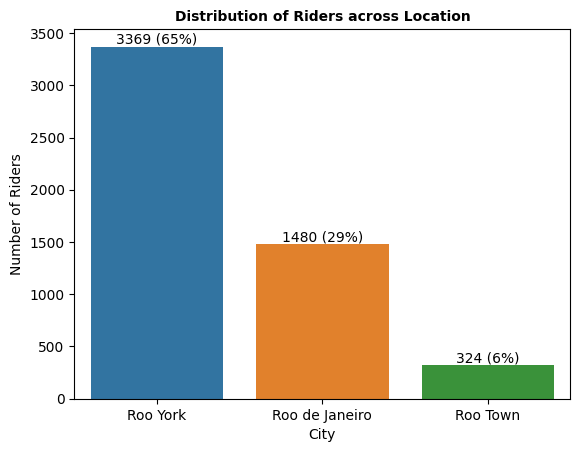

In [274]:
# Countplot for the column - LOCATION
ax = sns.countplot(x=pivot_df['LOCATION'],
                   order=pivot_df['LOCATION'].value_counts(ascending=False).index)

abs_values = pivot_df['LOCATION'].value_counts(ascending=False)
rel_values = pivot_df['LOCATION'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders across Location", fontsize=10, fontweight='bold')

# Set x-label and y-label
ax.set_xlabel("City")
ax.set_ylabel("Number of Riders")

# Show plot
# plt.xticks(rotation=90)
plt.show()


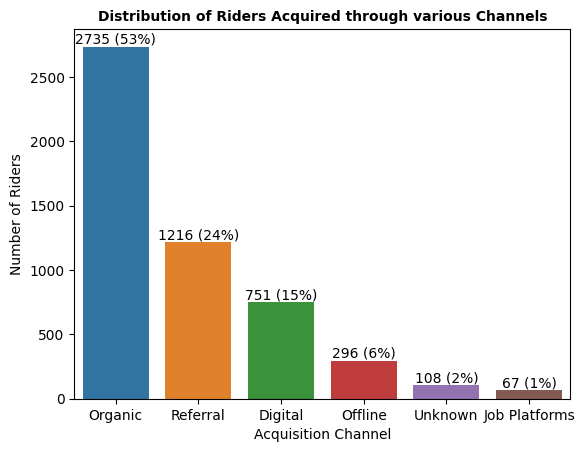

In [199]:
# Countplot for the column - ACQUISITION_CHANNEL
ax = sns.countplot(x=pivot_df['ACQUISITION_CHANNEL'],
                   order=pivot_df['ACQUISITION_CHANNEL'].value_counts(ascending=False).index)

abs_values = pivot_df['ACQUISITION_CHANNEL'].value_counts(ascending=False)
rel_values = pivot_df['ACQUISITION_CHANNEL'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders Acquired through various Channels", fontsize=10, fontweight='bold')

# Set x-label and y-label
ax.set_xlabel("Acquisition Channel")
ax.set_ylabel("Number of Riders")


# Show plot
# plt.xticks(rotation=90)
plt.show()


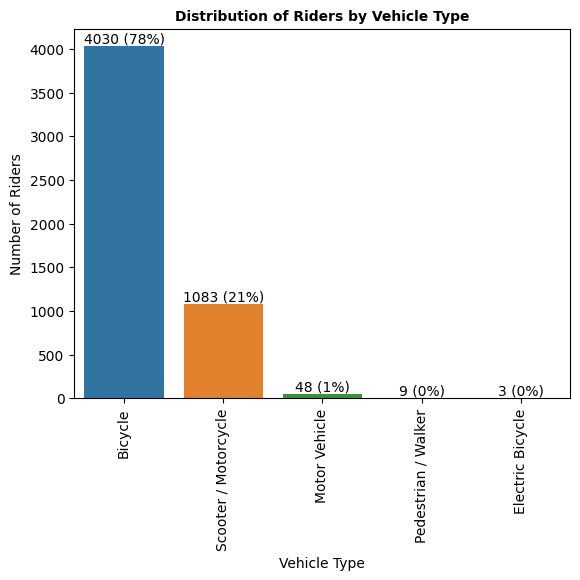

In [200]:
# Countplot for the column - VEHICLE_TYPE
ax = sns.countplot(x=pivot_df['VEHICLE_TYPE'],
                   order=pivot_df['VEHICLE_TYPE'].value_counts(ascending=False).index)

abs_values = pivot_df['VEHICLE_TYPE'].value_counts(ascending=False)
rel_values = pivot_df['VEHICLE_TYPE'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders by Vehicle Type", fontsize=10, fontweight='bold')

# Set x-label and y-label
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Number of Riders")

# Show plot
plt.xticks(rotation=90)
plt.show()


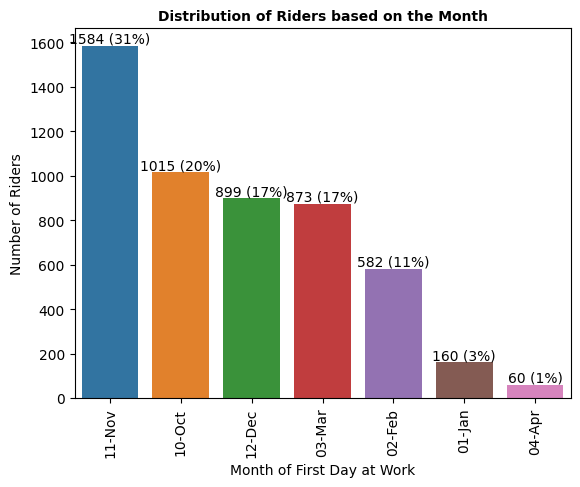

In [201]:
# Countplot for the column - FIRST_WORK_DATE_MONTH
ax = sns.countplot(x=pivot_df['FIRST_WORK_DATE_MONTH'],
                   order=pivot_df['FIRST_WORK_DATE_MONTH'].value_counts(ascending=False).index)

abs_values = pivot_df['FIRST_WORK_DATE_MONTH'].value_counts(ascending=False)
rel_values = pivot_df['FIRST_WORK_DATE_MONTH'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders based on the Month", fontsize=10, fontweight='bold')

# Set x-label and y-label
ax.set_xlabel("Month of First Day at Work")
ax.set_ylabel("Number of Riders")

# Show plot
plt.xticks(rotation=90)
plt.show()


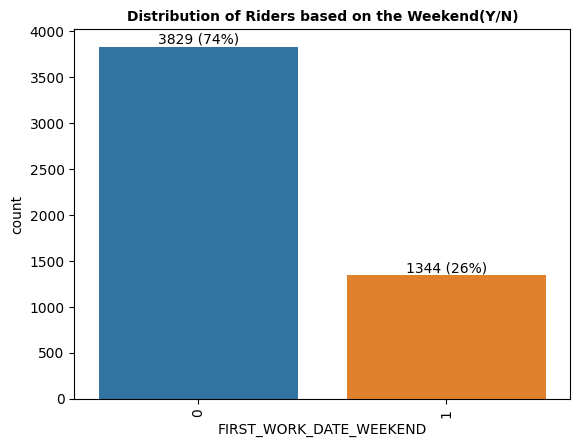

In [180]:
# Countplot for the column - FIRST_WORK_DATE_WEEKEND
ax = sns.countplot(x=pivot_df['FIRST_WORK_DATE_WEEKEND'],
                   order=pivot_df['FIRST_WORK_DATE_WEEKEND'].value_counts(ascending=False).index)

abs_values = pivot_df['FIRST_WORK_DATE_WEEKEND'].value_counts(ascending=False)
rel_values = pivot_df['FIRST_WORK_DATE_WEEKEND'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders based on the Weekend(Y/N)", fontsize=10, fontweight='bold')

# Show plot
plt.xticks(rotation=90)
plt.show()


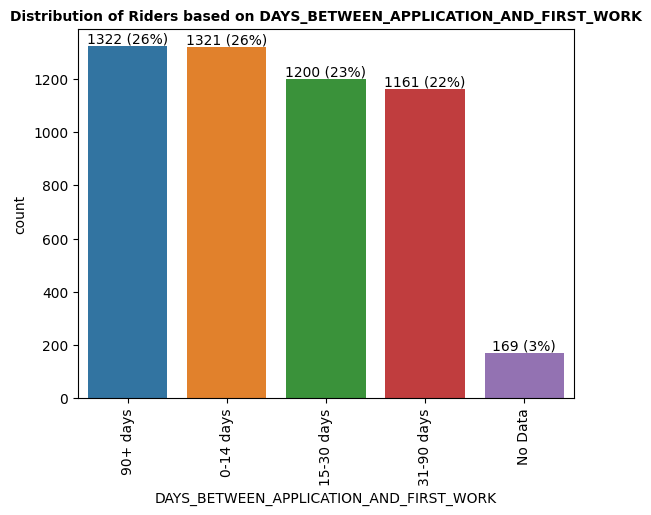

In [181]:
# Countplot for the column - DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK
ax = sns.countplot(x=pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'],
                   order=pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].value_counts(ascending=False).index)

abs_values = pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].value_counts(ascending=False)
rel_values = pivot_df['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Addding the title
ax.set_title("Distribution of Riders based on DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK", fontsize=10, fontweight='bold')

# Show plot
plt.xticks(rotation=90)
plt.show()


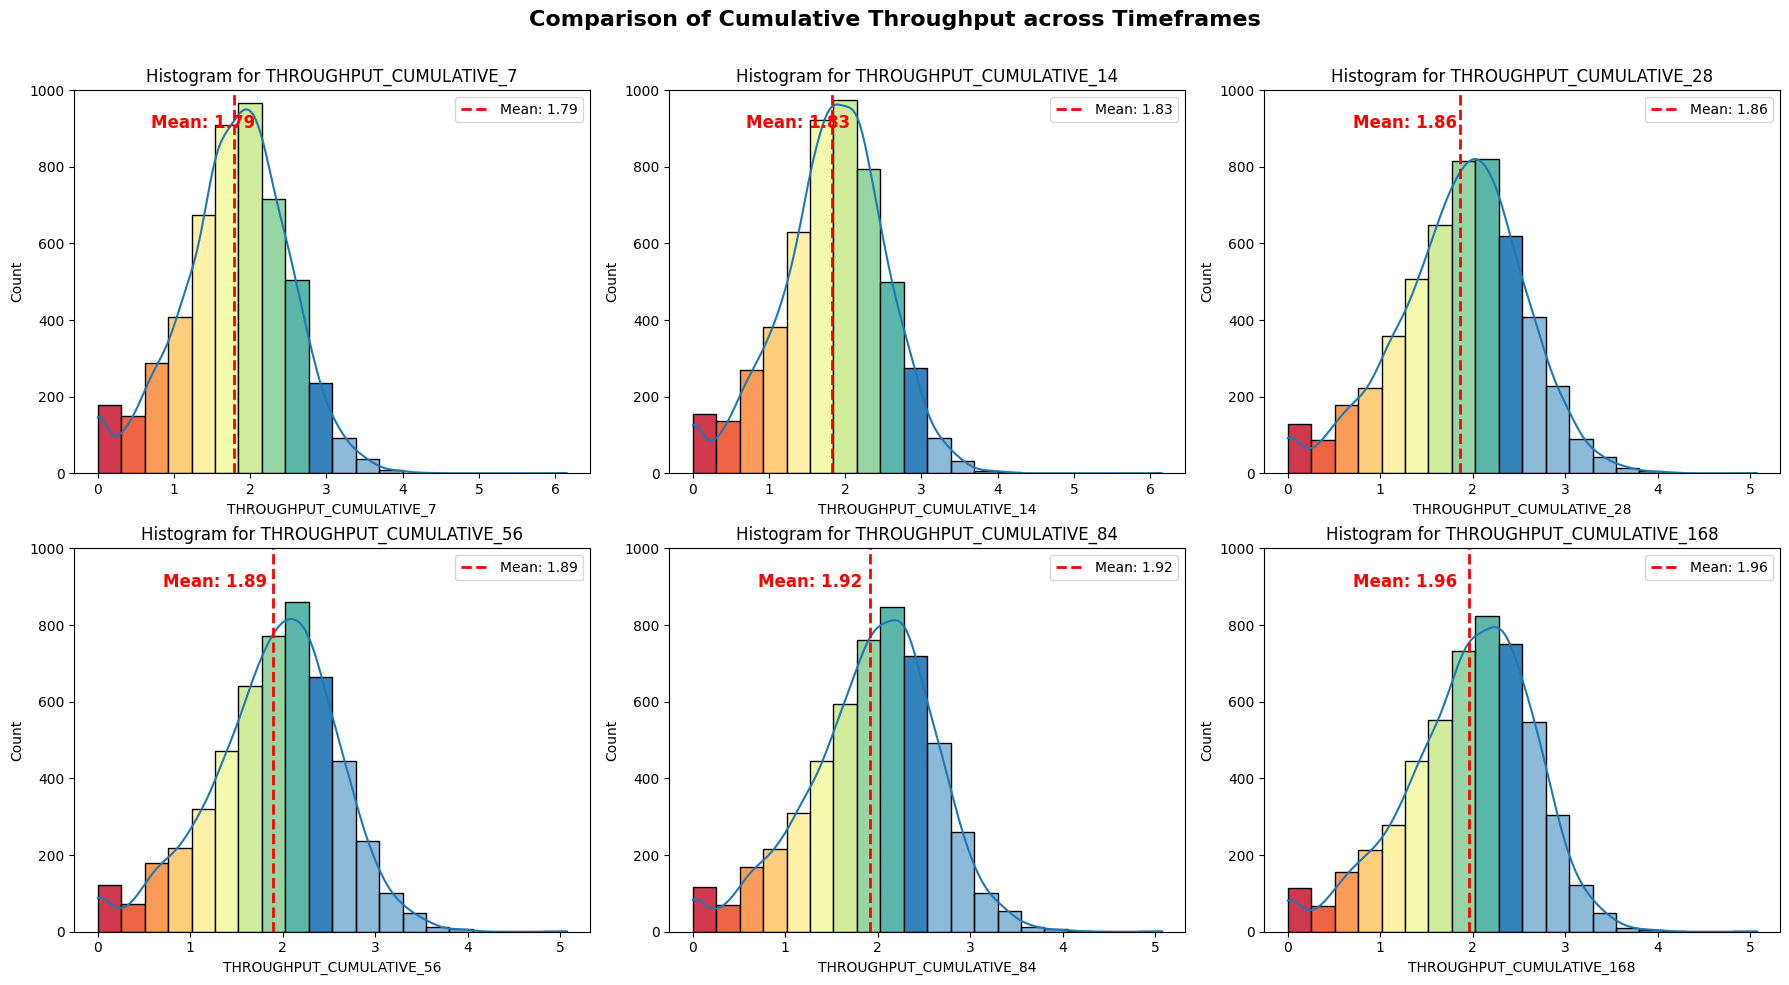

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to compare
columns_to_compare = ['THROUGHPUT_CUMULATIVE_7', 'THROUGHPUT_CUMULATIVE_14', 'THROUGHPUT_CUMULATIVE_28',
                      'THROUGHPUT_CUMULATIVE_56', 'THROUGHPUT_CUMULATIVE_84', 'THROUGHPUT_CUMULATIVE_168']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten axes to access subplots using a single index
axes = axes.flatten()

# Set a color palette for visual distinction
cm = sns.color_palette("Spectral", 10)

# Initialize a list to store mean values
mean_values = []

# Loop through columns and create histograms
for i, col in enumerate(columns_to_compare):
    plot = sns.histplot(pivot_df[col], bins=20, kde=True, ax=axes[i])
    plot.set_title(f'Histogram for {col}')
    for bin_, color in zip(plot.patches, cm):
        bin_.set_facecolor(color)

    # Set y-axis limit to 1000
    plot.set_ylim(0, 1000)

    # Calculate and display the mean value
    mean_value = pivot_df[col].mean()
    mean_values.append(mean_value)
    plot.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Display legend
    plot.legend()

# Remove empty subplots if needed
for i in range(len(columns_to_compare), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display mean values
for i, mean_value in enumerate(mean_values):
    axes[i].text(0.7, 900, f'Mean: {mean_value:.2f}', color='red', fontsize=12, fontweight='bold')

# Add the title
fig.suptitle("Comparison of Cumulative Throughput across Timeframes", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.9)  # Adjust the position of the title


plt.show()


In [196]:
lower_threshold = pivot_df['THROUGHPUT_CUMULATIVE_168'].quantile(0.01)
upper_threshold = pivot_df['THROUGHPUT_CUMULATIVE_168'].quantile(0.99)
print(lower_threshold, upper_threshold)

0.0 3.36


In [183]:
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK,FIRST_WORK_DATE_WEEKEND,FIRST_WORK_DATE_MONTH,SUCCESSFUL_REFERRAL_RATE
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41,15-30 days,0,04-Apr,1.0
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65,90+ days,1,10-Oct,0.0
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00,90+ days,1,04-Apr,0.0
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30,90+ days,0,10-Oct,0.0
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82,90+ days,0,03-Mar,0.0


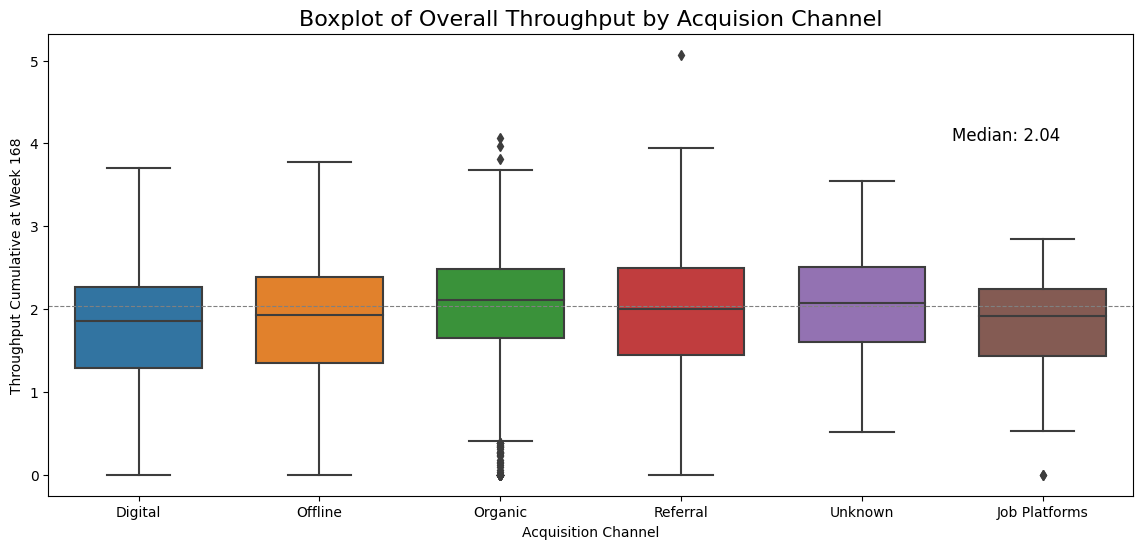

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df['ACQUISITION_CHANNEL'], y=abs(pivot_df['THROUGHPUT_CUMULATIVE_168']), width=0.7)

# Calculate the mean and display it as a label
median_value = abs(pivot_df['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df['ACQUISITION_CHANNEL'].unique()) - 1.5, y=median_value + 2, s=f'Median: {median_value:.2f}', fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add x-label and y-label
plt.xlabel('Acquisition Channel')
plt.ylabel('Throughput Cumulative at Week 168')

# Add a title
plt.title('Boxplot of Overall Throughput by Acquision Channel', fontsize=16)

plt.show()


In [224]:
pivot_df['SUCCESSFUL_REFERRAL_RATE'].describe()

count    5173.000000
mean        0.063186
std         0.215124
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SUCCESSFUL_REFERRAL_RATE, dtype: float64

In [185]:
# Hypothesis Test - 1

# Ho : Throughput has little/no significant effect on the acquisition channel
# Ha : Throughput has very significant effect on the acquisition channel

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
pivot_df_ref = pivot_df[pivot_df['ACQUISITION_CHANNEL'] == 'Referral']['THROUGHPUT_CUMULATIVE_168']
pivot_df_org = pivot_df[pivot_df['ACQUISITION_CHANNEL'] == 'Organic']['THROUGHPUT_CUMULATIVE_168']
ttest_result = ttest_ind(pivot_df_org, pivot_df_ref, alternative='greater')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,5))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  3.12
p-value:  0.00092
Since p_value < alpha we reject the null hypothesis.


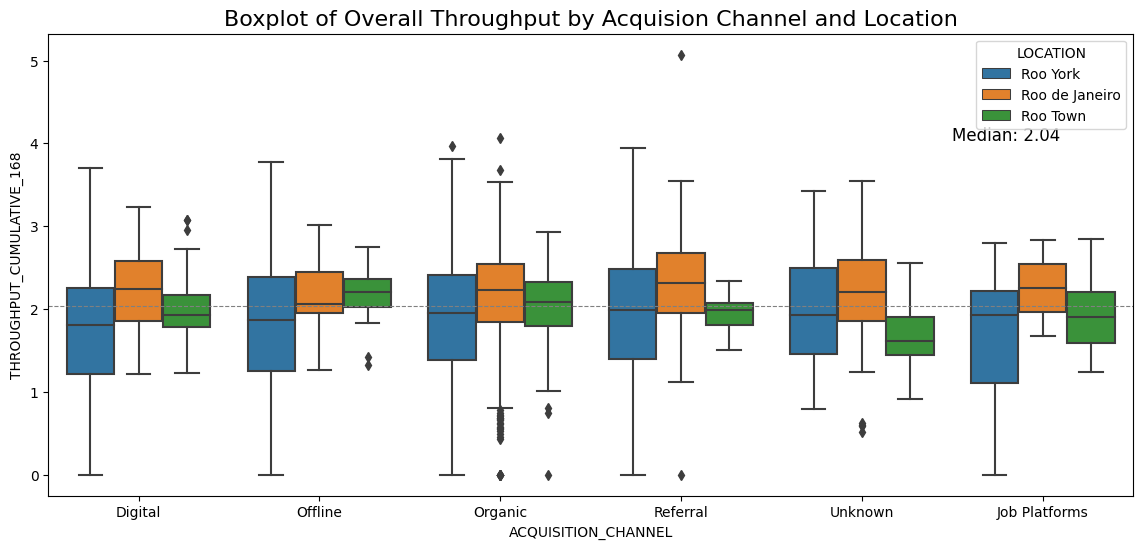

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df['ACQUISITION_CHANNEL'], y=abs(pivot_df['THROUGHPUT_CUMULATIVE_168']), hue=pivot_df['LOCATION'])

# Calculate the mean and display it as a label
median_value = abs(pivot_df['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df['ACQUISITION_CHANNEL'].unique()) - 1.5, y=median_value + 2, s=f'Median: {median_value:.2f}', fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add a title
plt.title('Boxplot of Overall Throughput by Acquision Channel and Location', fontsize=16)

plt.show()


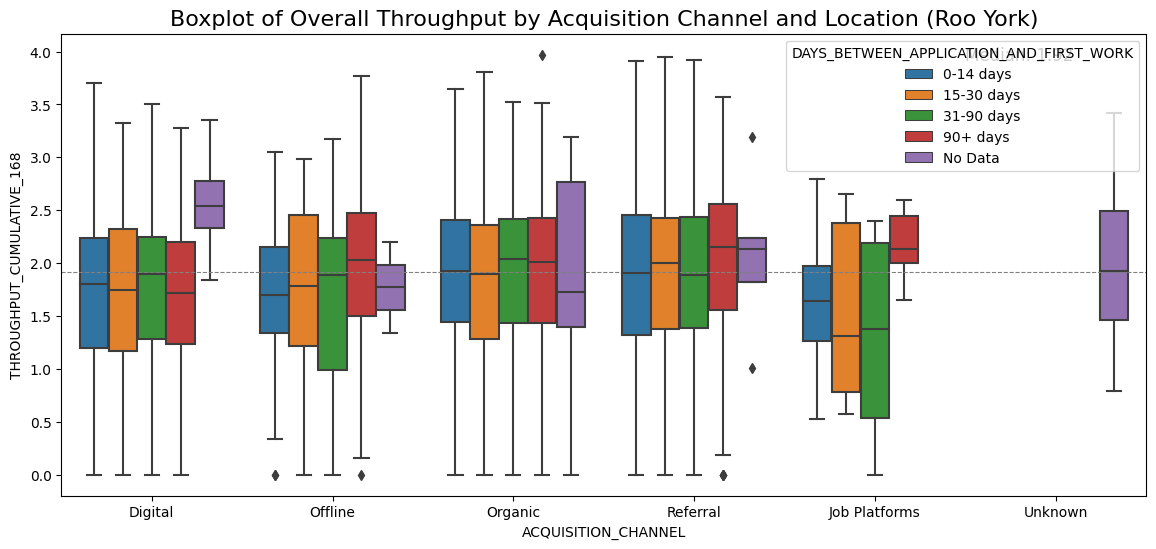

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df[pivot_df['LOCATION'] == 'Roo York']['ACQUISITION_CHANNEL'],
            y=abs(pivot_df[pivot_df['LOCATION'] == 'Roo York']['THROUGHPUT_CUMULATIVE_168']),
            hue=pivot_df[pivot_df['LOCATION'] == 'Roo York']['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'])

# Calculate the mean and display it as a label
median_value = abs(pivot_df[pivot_df['LOCATION'] == 'Roo York']['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df[pivot_df['LOCATION'] == 'Roo York']['ACQUISITION_CHANNEL'].unique()) - 1.5,
         y=median_value + 2,
         s=f'Median: {median_value:.2f}',
         fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add a title
plt.title('Boxplot of Overall Throughput by Acquisition Channel and Location (Roo York)', fontsize=16)

plt.show()


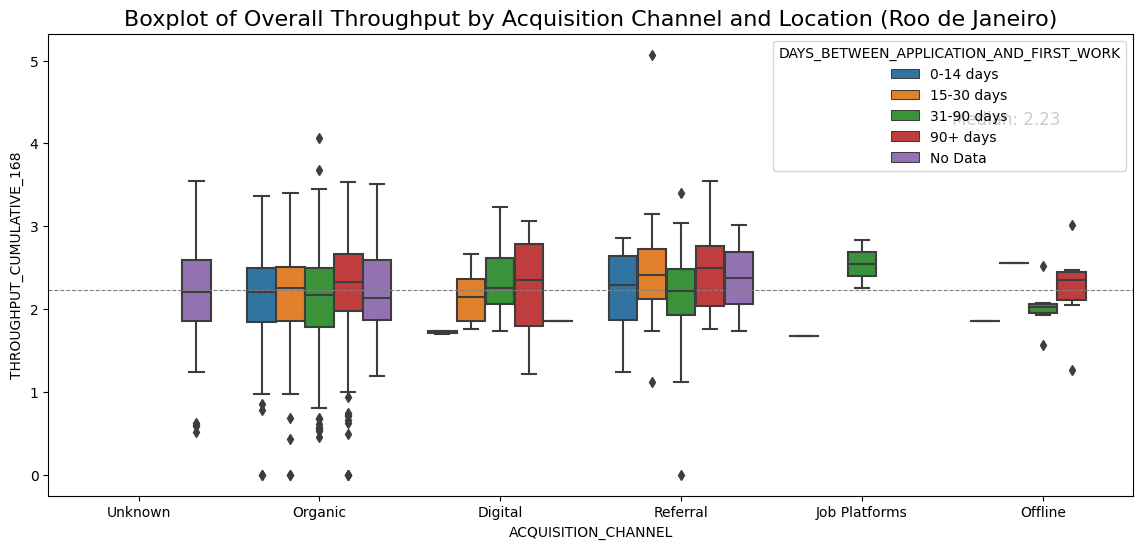

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']['ACQUISITION_CHANNEL'],
            y=abs(pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']['THROUGHPUT_CUMULATIVE_168']),
            hue=pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'])

# Calculate the mean and display it as a label
median_value = abs(pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']['ACQUISITION_CHANNEL'].unique()) - 1.5,
         y=median_value + 2,
         s=f'Median: {median_value:.2f}',
         fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add a title
plt.title('Boxplot of Overall Throughput by Acquisition Channel and Location (Roo de Janeiro)', fontsize=16)

plt.show()


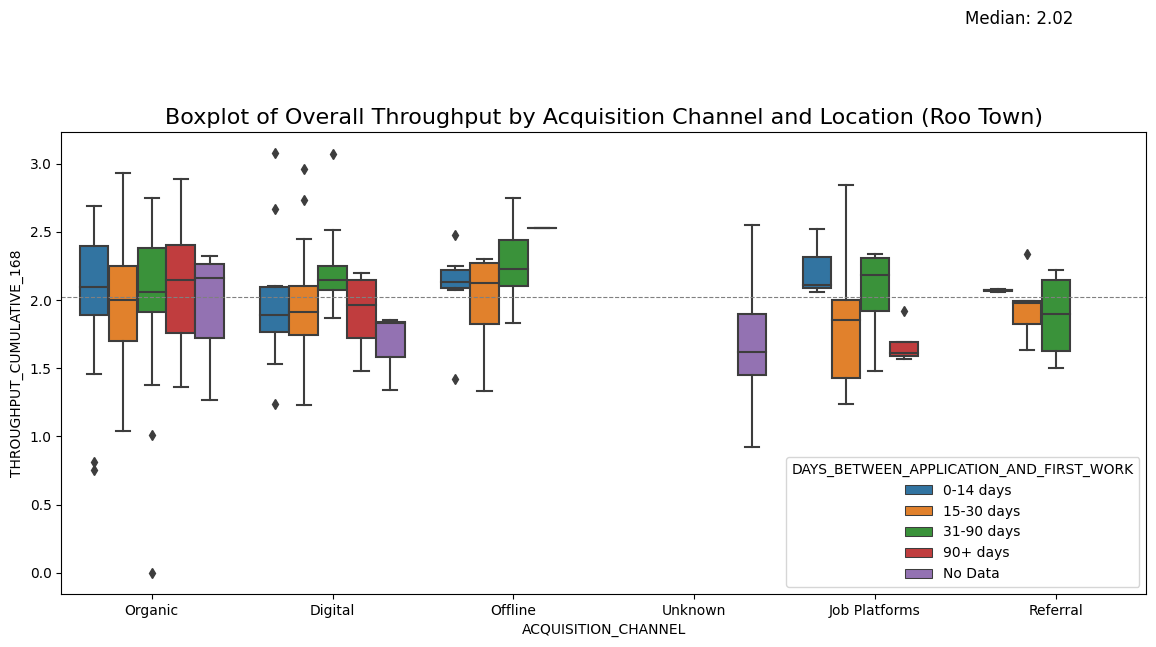

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df[pivot_df['LOCATION'] == 'Roo Town']['ACQUISITION_CHANNEL'],
            y=abs(pivot_df[pivot_df['LOCATION'] == 'Roo Town']['THROUGHPUT_CUMULATIVE_168']),
            hue=pivot_df[pivot_df['LOCATION'] == 'Roo Town']['DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK'])

# Calculate the mean and display it as a label
median_value = abs(pivot_df[pivot_df['LOCATION'] == 'Roo Town']['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df[pivot_df['LOCATION'] == 'Roo Town']['ACQUISITION_CHANNEL'].unique()) - 1.5,
         y=median_value + 2,
         s=f'Median: {median_value:.2f}',
         fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add a title
plt.title('Boxplot of Overall Throughput by Acquisition Channel and Location (Roo Town)', fontsize=16)

plt.show()


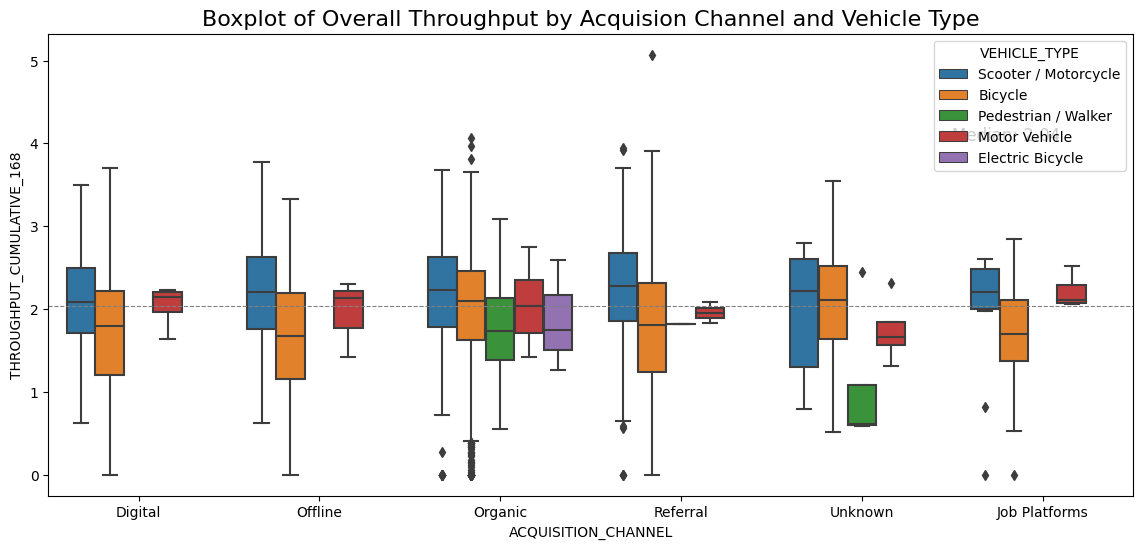

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x=pivot_df['ACQUISITION_CHANNEL'], y=abs(pivot_df['THROUGHPUT_CUMULATIVE_168']), hue=pivot_df['VEHICLE_TYPE'])

# Calculate the mean and display it as a label
median_value = abs(pivot_df['THROUGHPUT_CUMULATIVE_168']).median()
plt.text(x=len(pivot_df['ACQUISITION_CHANNEL'].unique()) - 1.5, y=median_value + 2, s=f'Median: {median_value:.2f}', fontsize=12)

# Add a horizontal dotted line at the median value
plt.gca().axhline(median_value, color='gray', linestyle='--', linewidth=0.8)

# Add a title
plt.title('Boxplot of Overall Throughput by Acquision Channel and Vehicle Type', fontsize=16)

plt.show()


In [191]:
# import matplotlib.pyplot as plt

# # Group pivot_df by 'ACQUISITION_CHANNEL' and calculate total successful and total referrals
# channel_grouped = pivot_df.groupby('ACQUISITION_CHANNEL').agg({
#     'SUCCESSFUL_REFERRALS_CUMULATIVE_168': 'sum',
#     'REFERRALS_CUMULATIVE_168': 'sum'
# }).reset_index()

# # Calculate 'SUCCESSFUL_REFERRAL%' and handle division by zero error
# channel_grouped['SUCCESSFUL_REFERRAL%'] = channel_grouped.apply(
#     lambda row: row['SUCCESSFUL_REFERRALS_CUMULATIVE_168'] / row['REFERRALS_CUMULATIVE_168']
#                   if row['REFERRALS_CUMULATIVE_168'] > 0 else 0,  # Handle division by zero error
#     axis=1
# )

# # Create a bar plot for 'SUCCESSFUL_REFERRAL%' by Acquisition Channel
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(x='ACQUISITION_CHANNEL', y='SUCCESSFUL_REFERRAL%', data=channel_grouped)
# plt.title('SUCCESSFUL_REFERRAL% by Acquisition Channel')
# plt.xlabel('Acquisition Channel')
# plt.ylabel('SUCCESSFUL_REFERRAL%')
# plt.xticks(rotation=45)

# # Add data labels to the bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
#                 textcoords='offset points')

# plt.show()


In [209]:
pivot_df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,HOURS_WORKED_CUMULATIVE_84,HOURS_WORKED_CUMULATIVE_168,ORDERS_DELIVERED_CUMULATIVE_7,ORDERS_DELIVERED_CUMULATIVE_14,ORDERS_DELIVERED_CUMULATIVE_28,ORDERS_DELIVERED_CUMULATIVE_56,ORDERS_DELIVERED_CUMULATIVE_84,ORDERS_DELIVERED_CUMULATIVE_168,REFERRALS_CUMULATIVE_7,REFERRALS_CUMULATIVE_14,REFERRALS_CUMULATIVE_28,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,DAYS_BETWEEN_APPLICATION_AND_FIRST_WORK,FIRST_WORK_DATE_WEEKEND,FIRST_WORK_DATE_MONTH,SUCCESSFUL_REFERRAL_RATE
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,Digital,Scooter / Motorcycle,41.0,59.6,85.0,245.9,431.3,810.4,90,140,228,606,1084,1952,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.20,2.35,2.68,2.46,2.51,2.41,15-30 days,0,04-Apr,1.0
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,Offline,Bicycle,15.7,15.7,15.7,15.7,15.7,15.7,26,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65,1.65,1.65,1.65,1.65,90+ days,1,10-Oct,0.0
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,Organic,Scooter / Motorcycle,7.4,11.2,23.3,23.3,23.3,23.3,21,31,70,70,70,70,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.85,2.78,3.00,3.00,3.00,3.00,90+ days,1,04-Apr,0.0
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,Digital,Bicycle,28.5,28.5,38.1,66.4,68.9,74.4,23,23,41,83,87,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.81,1.08,1.25,1.26,1.30,90+ days,0,10-Oct,0.0
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,Organic,Bicycle,9.3,17.1,19.5,23.8,23.8,23.8,23,44,52,67,67,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.48,2.57,2.67,2.82,2.82,2.82,90+ days,0,03-Mar,0.0


In [248]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats


# Hypothesis Testing: Compare RGR with other channels
rgr_data = pivot_df[pivot_df['ACQUISITION_CHANNEL'] == 'Referral']
other_channels_data = pivot_df[pivot_df['ACQUISITION_CHANNEL'] != 'Referral']

# Perform t-test to compare the means of successful referrals for RGR and other channels
t_stat, p_value = stats.ttest_ind(rgr_data['SUCCESSFUL_REFERRAL_RATE'], other_channels_data['SUCCESSFUL_REFERRAL_RATE'], alternative= "greater", equal_var=False)

print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null hypothesis rejected: RGR performs significantly differently from other channels.")
else:
    print("Null hypothesis not rejected: No significant difference between RGR and other channels.")

T-test results - t-statistic: 8.027515522910827, p-value: 9.605858389068536e-16
Null hypothesis rejected: RGR performs significantly differently from other channels.


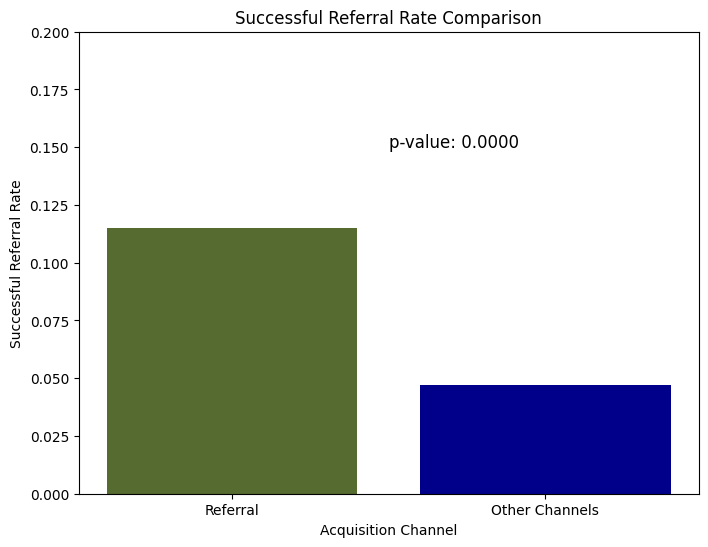

In [249]:
# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Referral', 'Other Channels'], [rgr_data['SUCCESSFUL_REFERRAL_RATE'].mean(), other_channels_data['SUCCESSFUL_REFERRAL_RATE'].mean()], color=['darkolivegreen', 'darkblue'])
plt.xlabel('Acquisition Channel')
plt.ylabel('Successful Referral Rate')
plt.title('Successful Referral Rate Comparison')
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.15), fontsize=12, color='black')
plt.ylim(0, 0.2)  # Adjust the y-axis limits as needed
plt.show()

In [250]:

# Calculate average throughput for RGR and other channels
avg_throughput_rgr = rgr_data['THROUGHPUT_CUMULATIVE_168'].mean()
avg_throughput_other = other_channels_data['THROUGHPUT_CUMULATIVE_168'].mean()

print(f'Average Throughput for RGR: {avg_throughput_rgr}')
print(f'Average Throughput for Other Channels: {avg_throughput_other}')



# Perform t-test to compare the means of throughput for RGR and other channels
t_stat, p_value = stats.ttest_ind(rgr_data['THROUGHPUT_CUMULATIVE_168'], other_channels_data['THROUGHPUT_CUMULATIVE_168'], alternative= "greater", equal_var=False)

print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null hypothesis rejected: average throughput for RGR significantly different from other channels.")
else:
    print("Null hypothesis not rejected: No significant difference between RGR and other channels.")

Average Throughput for RGR: 1.9513075657894736
Average Throughput for Other Channels: 1.9567652261814505
T-test results - t-statistic: -0.22619718339625874, p-value: 0.589463711589524
Null hypothesis not rejected: No significant difference between RGR and other channels.


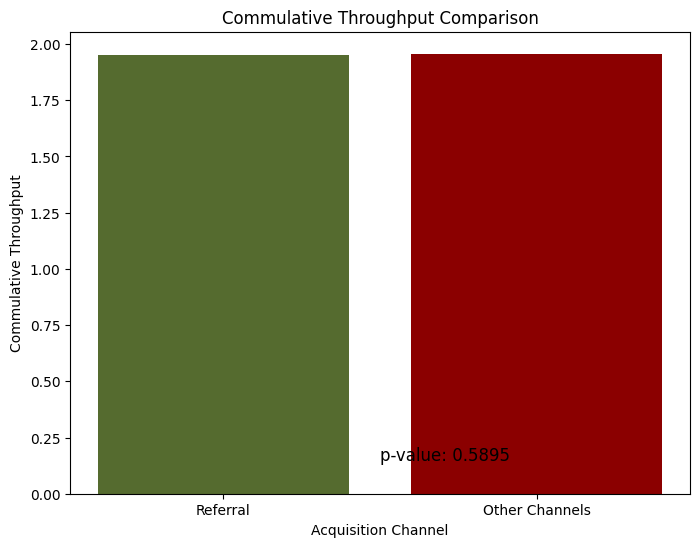

In [251]:
# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Referral', 'Other Channels'], [rgr_data['THROUGHPUT_CUMULATIVE_168'].mean(), other_channels_data['THROUGHPUT_CUMULATIVE_168'].mean()], color=['darkolivegreen', 'darkred'])
plt.xlabel('Acquisition Channel')
plt.ylabel('Commulative Throughput')
plt.title('Commulative Throughput Comparison')
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.15), fontsize=12, color='black')
plt.show()

In [259]:
pivot_df['LOCATION'].value_counts()

Roo York          3369
Roo de Janeiro    1480
Roo Town           324
Name: LOCATION, dtype: int64

In [268]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

pivot_df_york = pivot_df[pivot_df['LOCATION'] == 'Roo York']

# Hypothesis Testing: Compare RGR with other channels
rgr_data = pivot_df_york[pivot_df_york['ACQUISITION_CHANNEL'] == 'Referral']
other_channels_data = pivot_df_york[pivot_df_york['ACQUISITION_CHANNEL'] != 'Referral']

# Perform t-test to compare the means of successful referrals for RGR and other channels
t_stat, p_value = stats.ttest_ind(rgr_data['SUCCESSFUL_REFERRAL_RATE'], other_channels_data['SUCCESSFUL_REFERRAL_RATE'], alternative= "greater", equal_var=False)

print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null hypothesis rejected: RGR performs significantly differently from other channels in Roo York.")
else:
    print("Null hypothesis not rejected: No significant difference between RGR and other channels in Roo York.")

T-test results - t-statistic: 5.973244188408655, p-value: 1.3982778339342237e-09
Null hypothesis rejected: RGR performs significantly differently from other channels in Roo York.


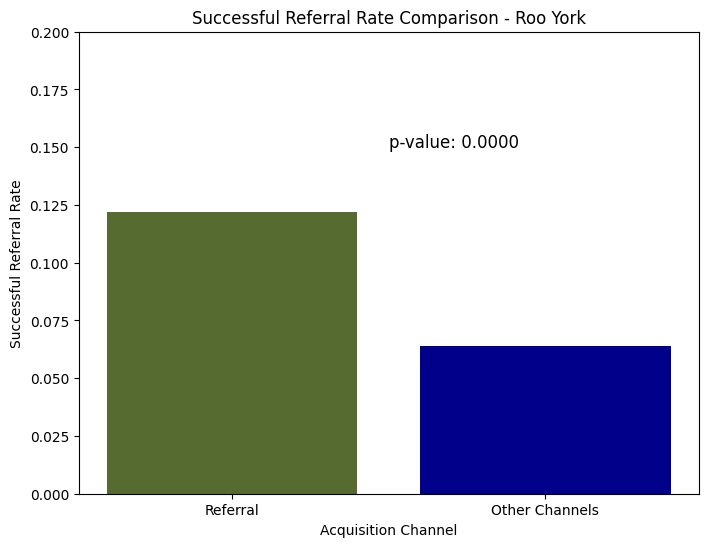

In [269]:
# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Referral', 'Other Channels'], [rgr_data['SUCCESSFUL_REFERRAL_RATE'].mean(), other_channels_data['SUCCESSFUL_REFERRAL_RATE'].mean()], color=['darkolivegreen', 'darkblue'])
plt.xlabel('Acquisition Channel')
plt.ylabel('Successful Referral Rate')
plt.title('Successful Referral Rate Comparison - Roo York')
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.15), fontsize=12, color='black')
plt.ylim(0, 0.2)  # Adjust the y-axis limits as needed
plt.show()

In [270]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

pivot_df_janeiro = pivot_df[pivot_df['LOCATION'] == 'Roo de Janeiro']

# Hypothesis Testing: Compare RGR with other channels
rgr_data = pivot_df_janeiro[pivot_df_janeiro['ACQUISITION_CHANNEL'] == 'Referral']
other_channels_data = pivot_df_janeiro[pivot_df_janeiro['ACQUISITION_CHANNEL'] != 'Referral']

# Perform t-test to compare the means of successful referrals for RGR and other channels
t_stat, p_value = stats.ttest_ind(rgr_data['SUCCESSFUL_REFERRAL_RATE'], other_channels_data['SUCCESSFUL_REFERRAL_RATE'], alternative= "greater", equal_var=False)

print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null hypothesis rejected: RGR performs significantly differently from other channels in Roo York.")
else:
    print("Null hypothesis not rejected: No significant difference between RGR and other channels in Roo York.")

T-test results - t-statistic: 1.2404917695427602, p-value: 0.10898620647924005
Null hypothesis not rejected: No significant difference between RGR and other channels in Roo York.


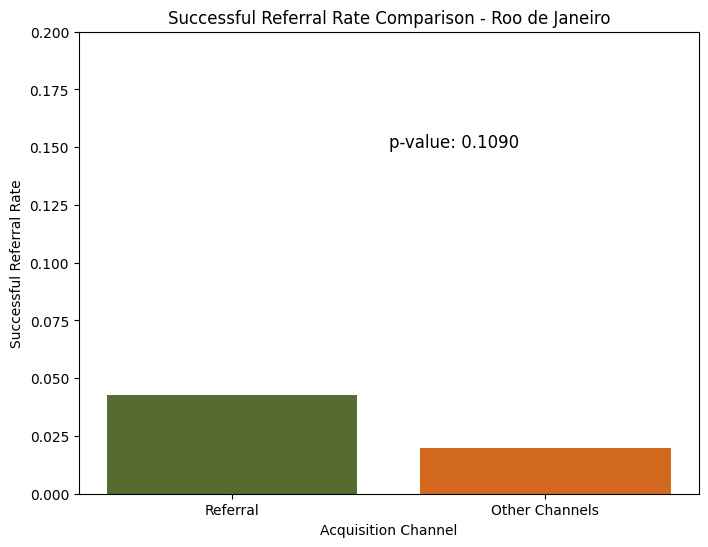

In [271]:
# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Referral', 'Other Channels'], [rgr_data['SUCCESSFUL_REFERRAL_RATE'].mean(), other_channels_data['SUCCESSFUL_REFERRAL_RATE'].mean()], color=['darkolivegreen', 'chocolate'])
plt.xlabel('Acquisition Channel')
plt.ylabel('Successful Referral Rate')
plt.title('Successful Referral Rate Comparison - Roo de Janeiro')
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.15), fontsize=12, color='black')
plt.ylim(0, 0.2)  # Adjust the y-axis limits as needed
plt.show()

In [272]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

pivot_df_town = pivot_df[pivot_df['LOCATION'] == 'Roo Town']

# Hypothesis Testing: Compare RGR with other channels
rgr_data = pivot_df_town[pivot_df_town['ACQUISITION_CHANNEL'] == 'Referral']
other_channels_data = pivot_df_town[pivot_df_town['ACQUISITION_CHANNEL'] != 'Referral']

# Perform t-test to compare the means of successful referrals for RGR and other channels
t_stat, p_value = stats.ttest_ind(rgr_data['SUCCESSFUL_REFERRAL_RATE'], other_channels_data['SUCCESSFUL_REFERRAL_RATE'], alternative= "greater", equal_var=False)

print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null hypothesis rejected: RGR performs significantly differently from other channels in Roo York.")
else:
    print("Null hypothesis not rejected: No significant difference between RGR and other channels in Roo York.")

T-test results - t-statistic: -0.2993288810675627, p-value: 0.615696235737511
Null hypothesis not rejected: No significant difference between RGR and other channels in Roo York.


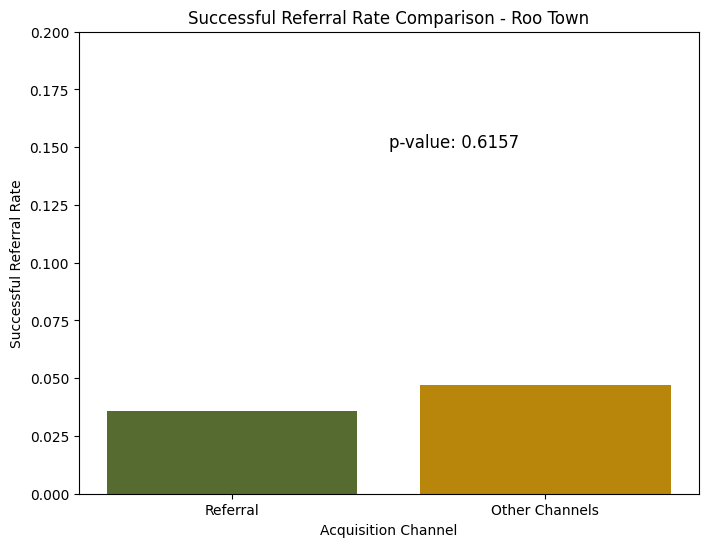

In [273]:
# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Referral', 'Other Channels'], [rgr_data['SUCCESSFUL_REFERRAL_RATE'].mean(), other_channels_data['SUCCESSFUL_REFERRAL_RATE'].mean()], color=['darkolivegreen', 'darkgoldenrod'])
plt.xlabel('Acquisition Channel')
plt.ylabel('Successful Referral Rate')
plt.title('Successful Referral Rate Comparison - Roo Town')
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.15), fontsize=12, color='black')
plt.ylim(0, 0.2)  # Adjust the y-axis limits as needed
plt.show()